In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [2]:
# os.chdir('C:/Users/dmarquez/OneDrive - Lortek S.Coop/Escritorio/David/digital/00_main/IA/projects/money_counter')
img_files = glob('00_data/*jpg')
img_files[0]

'00_data/image_12.jpg'

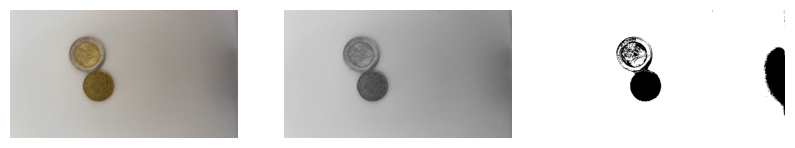

In [4]:
img_num = 0
img_n = os.path.basename(img_files[img_num]).split('.')[0]
img = cv2.imread(f'00_data/{img_n}.jpg')
img = cv2.resize(img, None, fx = .7, fy=.7)

imgPre = cv2.medianBlur(img,21)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img_thers = cv2.threshold(img_gray, 120, 255, cv2.THRESH_BINARY)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 12))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.axis('off')
ax2.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
ax2.axis('off')
ax3.imshow(cv2.cvtColor(img_thers, cv2.COLOR_BGR2RGB))
ax3.axis('off')
plt.show()



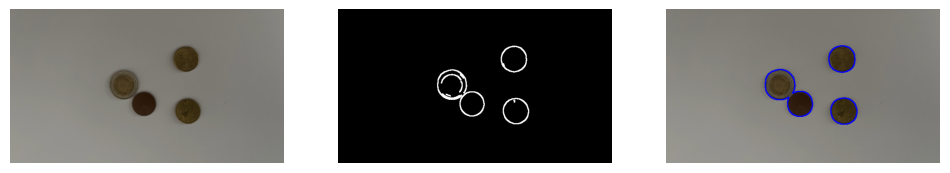

In [23]:
img_num = 4
img_n = os.path.basename(img_files[img_num]).split('.')[0]
img = cv2.imread(f'imagenes/{img_n}.jpg')
img = cv2.resize(img, None, fx = .7, fy=.7)

imgPre = cv2.GaussianBlur(img, (3,3), 2)
imgPre = cv2.Canny(imgPre, 71 ,102)
kernel = np.ones((3, 3), np.uint8)
imgPre = cv2.dilate(imgPre, kernel, iterations=1)

contornos, _ = cv2.findContours(imgPre, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

imagen_contornos = img.copy()
cv2.drawContours(imagen_contornos, contornos, -1, (255, 0, 0), 2)

# f, ax = plt.subplots(figsize=(8, 8))
# ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# ax.axis('off')
# plt.show()

# f, ax = plt.subplots(figsize=(8, 8))
# ax.imshow(cv2.cvtColor(imagen_contornos, cv2.COLOR_BGR2RGB))
# ax.axis('off')
# plt.show()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.axis('off')
ax2.imshow(cv2.cvtColor(imgPre, cv2.COLOR_BGR2RGB))
ax2.axis('off')
ax3.imshow(cv2.cvtColor(imagen_contornos, cv2.COLOR_BGR2RGB))
ax3.axis('off')
plt.show()


## Watershed Algorithm

In [18]:
img_num = 2
img_n = os.path.basename(img_files[img_num]).split('.')[0]
img = cv2.imread(f'imagenes/{img_n}.jpg')
img = cv2.resize(img, None, fx = .7, fy=.7)

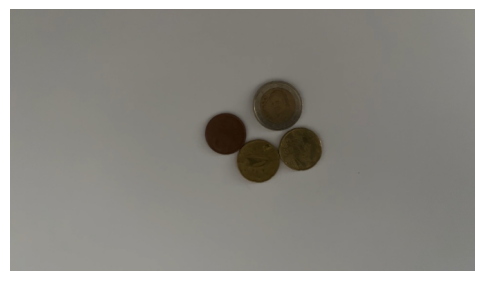

In [19]:
f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()

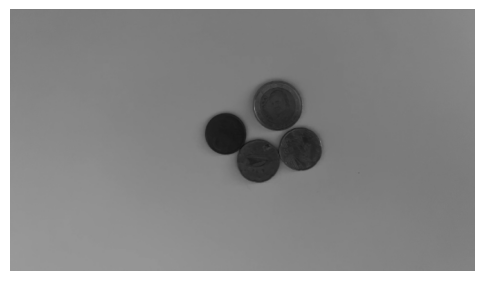

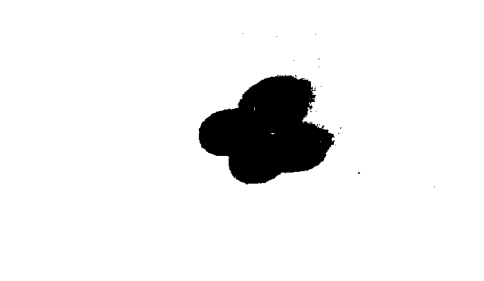

In [20]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# _, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV)

_, thresh = cv2.threshold(gray,120,255,cv2.THRESH_BINARY)


f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()

f, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()

In [8]:
for i in range(5):
    print(i)

0
1
2
3
4


In [47]:
import cv2
import cvzone
import numpy as np

img_num = 0
img_n = os.path.basename(img_files[img_num]).split('.')[0]


def empty(a):
    pass

cv2.namedWindow('Settings')
cv2.resizeWindow('Settings', 640,240)
cv2.createTrackbar('Threshold1','Settings', 50,255, empty)
cv2.createTrackbar('Threshold2','Settings', 50,255, empty)

def preProcessing(img):
    imgPre = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imgPre = cv2.GaussianBlur(img, (5,5), 5)
    thres1 = cv2.getTrackbarPos('Threshold1', 'Settings')
    thres2 = cv2.getTrackbarPos('Threshold2', 'Settings')
    imgPre = cv2.Canny(imgPre, thres1 ,thres2)
    return imgPre

while True:
    img = cv2.imread(f'imagenes/{img_n}.jpg')
    imgPre = preProcessing(img)
    imgStacked = cvzone.stackImages([img, imgPre], 2, 1)
    cv2.imshow('Image', imgStacked)
    if cv2.waitKey(1) == ord('q'):
        break

cv2.destroyAllWindows()